## Yolo 적용을 위한 파이썬과 딥러닝 이해
# MNIST 이해
- MNIST 는 필기체 숫자 이미지들이다.
- 과연 컴퓨터가 필기 이미지를 보고 숫자를 판별할 수 있을까?

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### MNIST 불러오기

In [1]:
from keras.datasets import mnist

In [77]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5,1,'5')

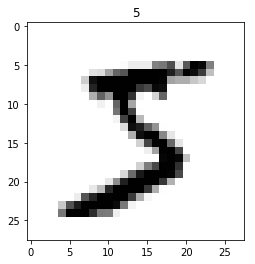

In [12]:
plt.imshow(X_train[0], cmap='gray_r')
plt.title(y_train[0])

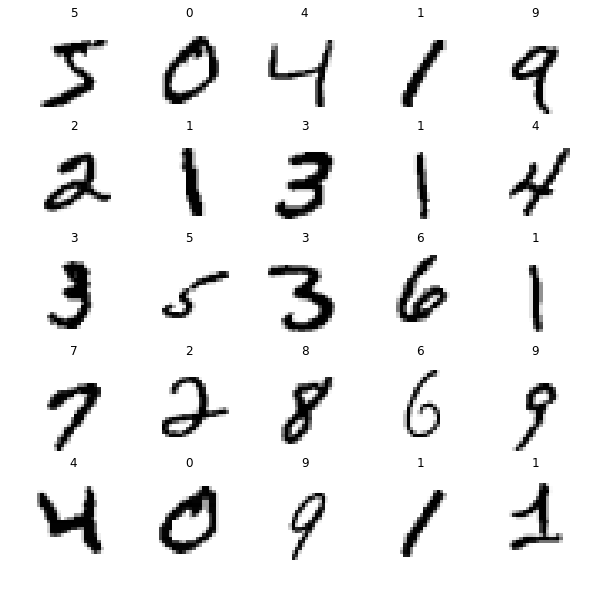

In [15]:
plt.figure(figsize=[10,10])

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')
    plt.title(y_train[i])

### 데이터 변환 (전처리)

In [78]:
X_train.max(), X_train.dtype

(255, dtype('uint8'))

In [42]:
X_train = X_train.reshape(60000,-1)/255.
y_train = pd.get_dummies(y_train).values

In [44]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [48]:
X_test = X_test.reshape(10000,-1)/255.
y_test = pd.get_dummies(y_test).values

In [76]:
X_test.shape, y_test.shape

((10000, 784), (10000, 10))

### Keras 무작정 적용하기

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [47]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 465us/step - loss: 0.2862 - acc: 0.9170 - val_loss: 0.1392 - val_acc: 0.9612
Epoch 2/20
48000/48000 [==============================] - 21s 446us/step - loss: 0.1184 - acc: 0.9654 - val_loss: 0.1053 - val_acc: 0.9691
Epoch 3/20
48000/48000 [==============================] - 22s 466us/step - loss: 0.0769 - acc: 0.9777 - val_loss: 0.0877 - val_acc: 0.9743
Epoch 4/20
48000/48000 [==============================] - 22s 463us/step - loss: 0.0559 - acc: 0.9831 - val_loss: 0.0924 - val_acc: 0.9737
Epoch 5/20
48000/48000 [==============================] - 19s 404us/step - loss: 0.0413 - acc: 0.9879 - val_loss: 0.0806 - val_acc: 0.9763
Epoch 6/20
48000/48000 [==============================] - 21s 445us/step - loss: 0.0313 - acc: 0.9906 - val_loss: 0.0859 - val_acc: 0.9766
Epoch 7/20
48000/48000 [==============================] - 21s 447us/step - loss: 0.0234 - acc: 0.9933 - val_loss: 0.

- 결과 평가

In [49]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 297us/step


[0.10009070664111389, 0.9809]

- 학습 과정 보기

In [51]:
h = history.history
h.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

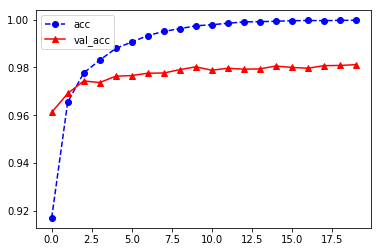

In [52]:
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])

### 그림판에서 숫자 만들기

In [73]:
img = plt.imread('0.jpg')
img = 1 - img/255.
img.shape

(28, 28)

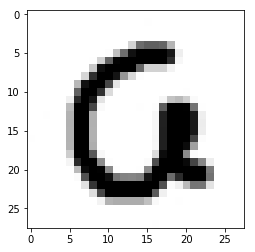

In [74]:
plt.imshow(img, cmap='gray_r')

In [75]:
model.predict(img.reshape(1,28*28))

array([[9.9927050e-01, 8.3288435e-27, 2.4921317e-07, 3.9775900e-13,
        2.5820879e-25, 7.2862103e-04, 5.5162732e-13, 2.0701169e-18,
        5.8822222e-20, 5.3809669e-07]], dtype=float32)

### CNN 적용
- Convolution(필터) 와 Pooling(사이즈 줄이기) 적용

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [87]:
X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.

In [88]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [89]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [90]:
from keras.layers import Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [92]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 180s 4ms/step - loss: 0.2269 - acc: 0.9318 - val_loss: 0.0852 - val_acc: 0.9747
Epoch 2/10
48000/48000 [==============================] - 178s 4ms/step - loss: 0.0600 - acc: 0.9815 - val_loss: 0.0575 - val_acc: 0.9822
Epoch 3/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.0369 - acc: 0.9890 - val_loss: 0.0540 - val_acc: 0.9843
Epoch 4/10
48000/48000 [==============================] - 174s 4ms/step - loss: 0.0238 - acc: 0.9931 - val_loss: 0.0484 - val_acc: 0.9860
Epoch 5/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0550 - val_acc: 0.9843
Epoch 6/10
48000/48000 [==============================] - 173s 4ms/step - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0583 - val_acc: 0.9859
Epoch 7/10
48000/48000 [==============================] - 204s 4ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0573 - 

In [93]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 16s 2ms/step


[0.05738178555705638, 0.9881]

- 학습 과정 보기

In [94]:
h = history.history
h.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

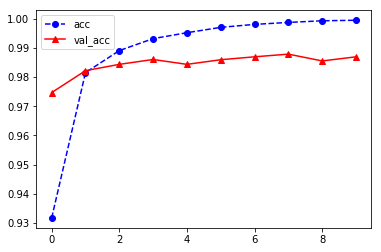

In [95]:
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])

### 필터 분석

In [96]:
ws = model.get_weights()

In [99]:
type(ws), len(ws)

(list, 6)

In [100]:
ws[0].shape, ws[1].shape

((3, 3, 1, 32), (32,))

In [101]:
w0 = ws[0].reshape(3,3,32)

In [105]:
h = w0.max()
l = w0.min()

h, l

(0.32775244, -0.47311878)

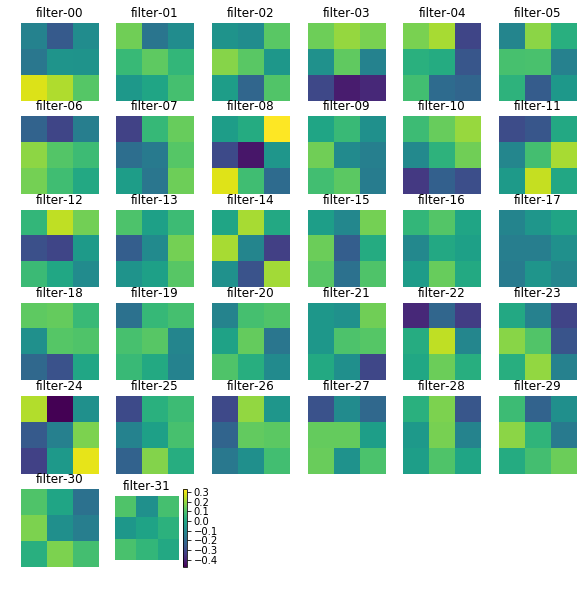

In [106]:
plt.figure(figsize=[10,10])

for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(w0[:,:,i], vmax=h, vmin=l)
    plt.axis('off')
    plt.title('filter-%02d' % i)
    if i==31: plt.colorbar()

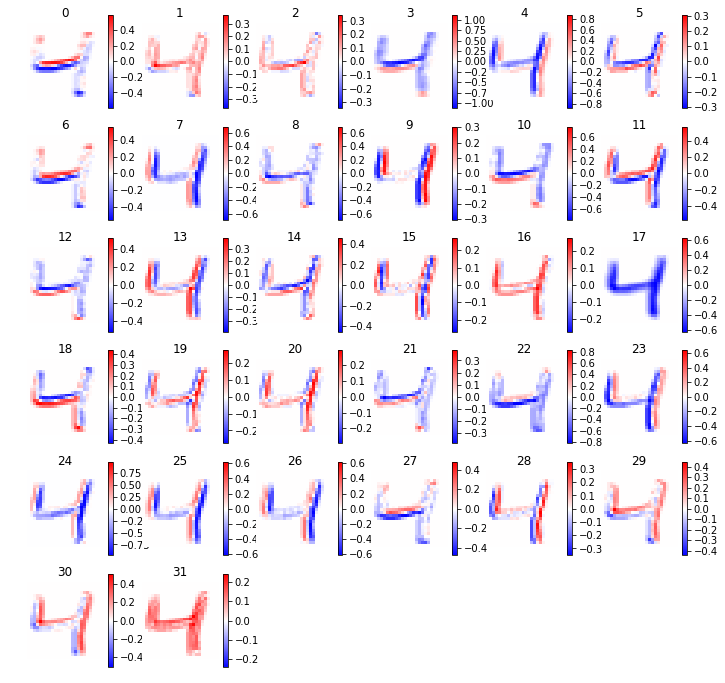

In [132]:
plt.figure(figsize=[12,12])

for ch in range(32):
    image = X_train[2].reshape(28,28)
    filter = w0[:,:,ch] # 필터 번호 지정 (0~31)

    conv = []
    for r in range(26): # 28-3+1
        l = []
        for c in range(26): # 28-3+1
            l.append((image[r:r+3, c:c+3]*filter).sum())
        conv.append(l)

    conv = np.array(conv)

    plt.subplot(6,6,ch+1)
    h = conv.max()
    l = conv.min()
    hh = max([abs(h), abs(l)])
    
    plt.imshow(conv, vmax=hh, vmin=-hh, cmap='bwr')
    plt.axis('off')
    plt.title(ch)
    plt.colorbar()